In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

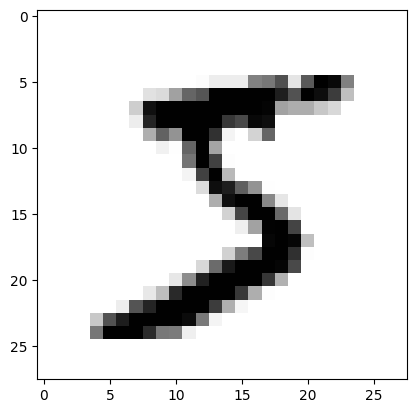

In [4]:
plt.imshow(X_train[0],cmap='binary')

In [5]:
def plot_input_img(i):
  plt.imshow(X_train[i],cmap='binary')
  plt.title(y_train[i])
  plt.show()

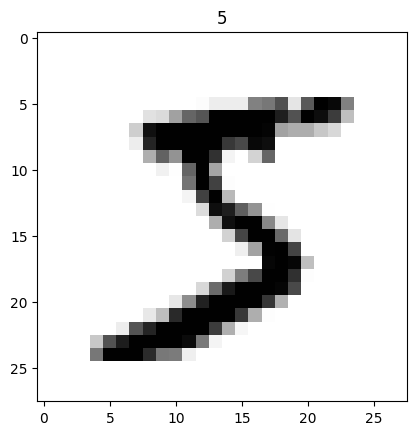

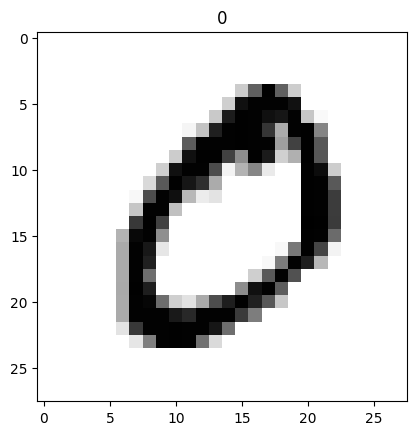

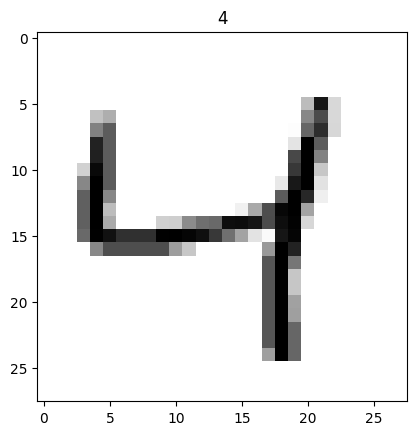

In [6]:
for i in range(3):
  plot_input_img(i)

In [7]:
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

X_train=np.expand_dims(X_train,-1);
X_test=np.expand_dims(X_test,-1);

y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

In [9]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [10]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)
mc=ModelCheckpoint("./bestmodel.h5",monitor="val_accuracy",verbose=1,save_best_only=True)
cb=[es,mc]

In [11]:
his=model.fit(X_train,y_train,epochs=5,validation_split=0.3,callbacks=cb)

Epoch 1/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.2110 - accuracy: 0.9364WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 1: val_accuracy improved from -inf to 0.97578, saving model to .\bestmodel.h5
1313/1313 [==============================] - 47s 34ms/step - loss: 0.2107 - accuracy: 0.9365 - val_loss: 0.0788 - val_accuracy: 0.9758
Epoch 2/5
1313/1313 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9768WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 2: val_accuracy improved from 0.97578 to 0.98272, saving model to .\bestmodel.h5
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0741 - accuracy: 0.9768 - val_loss: 0.0599 - val_accuracy: 0.9827
Epoch 3/5
1312/1313 [============================>.] - ETA: 0s - lo

In [12]:
model_S=keras.models.load_model("./bestmodel.h5")

In [13]:
score=model_S.evaluate(X_test,y_test)
print(f"the model accuracy is {score[1]}")

313/313 [==============================] - 4s 11ms/step - loss: 0.0349 - accuracy: 0.9884
the model accuracy is 0.9883999824523926
